**Business Objective:**

To develop a predictive model that classifies individuals as Introverts or Extroverts based on their social behavior and activity patterns, helping businesses tailor products, services, or marketing strategies to better suit personality-driven preferences.


| Column Name                  | Description                                                                 |
|-----------------------------|-----------------------------------------------------------------------------|
| `Time_spent_Alone`          | Number of hours a person spends alone on average daily.                    |
| `Stage_fear`                | Indicates whether the person has fear of public speaking (Yes/No).         |
| `Social_event_attendance`   | Number of social events attended in a month.                               |
| `Going_outside`             | Indicates if the person willingly goes outside regularly (Yes/No).         |
| `Drained_after_socializing`| Indicates if the person feels mentally drained after social interactions.  |
| `Friends_circle_size`       | Number of close or frequent friends in the person’s circle.                |
| `Post_frequency`            | Number of posts shared on social media per week.                          |
| `Personality`               | Target variable; indicates if the person is an Introvert or Extrovert.     |


In [1]:
# Importing important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/personality_dataset.csv")
df.shape

(5000, 8)

In [3]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,3,Yes,6,7,No,14,5,Extrovert
1,2,No,8,6,No,7,8,Extrovert
2,1,No,9,4,No,9,3,Extrovert
3,8,No,0,0,Yes,9,3,Introvert
4,5,Yes,3,0,No,2,6,Introvert


In [4]:
df.tail()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
4995,5,No,6,5,No,14,8,Extrovert
4996,7,No,2,3,Yes,2,5,Introvert
4997,2,No,7,3,No,11,3,Extrovert
4998,2,Yes,9,3,No,15,7,Extrovert
4999,4,Yes,6,7,No,12,3,Extrovert


In [5]:
df.columns

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Time_spent_Alone           5000 non-null   int64 
 1   Stage_fear                 5000 non-null   object
 2   Social_event_attendance    5000 non-null   int64 
 3   Going_outside              5000 non-null   int64 
 4   Drained_after_socializing  5000 non-null   object
 5   Friends_circle_size        5000 non-null   int64 
 6   Post_frequency             5000 non-null   int64 
 7   Personality                5000 non-null   object
dtypes: int64(5), object(3)
memory usage: 312.6+ KB


In [7]:
# checking for dupicates and null values
print("Before Removing Duplicates: ",df.duplicated().sum()," : ", df.shape)
df.drop_duplicates(inplace=True)
print("After Removing Duplicates: ",df.duplicated().sum(), " : ",df.shape)

Before Removing Duplicates:  128  :  (5000, 8)
After Removing Duplicates:  0  :  (4872, 8)


In [8]:
print(df.isnull().sum().sum())

0


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time_spent_Alone,4872.0,4.976190,3.038156,0.0,3.0,5.0,7.0,11.0
Social_event_attendance,4872.0,4.993842,2.855725,0.0,3.0,5.0,7.0,10.0
Going_outside,4872.0,3.517857,2.089579,0.0,2.0,4.0,5.0,7.0
Friends_circle_size,4872.0,7.254310,4.058642,0.0,5.0,7.0,10.0,15.0
Post_frequency,4872.0,4.758621,2.783804,0.0,3.0,5.0,7.0,10.0


**Basic DataSet Summary:**

* Total number of data points are: (Rows = 5000, columns = 8)
* These are the columns we will be working with: ['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality']
* We have a total of 5 numerical columns and 3 categorical columns.
* There were quite a few number of duplicated rows, we handled them.
* Fortunately we don't have any null values in any columns.

In [10]:
# Let's separate categorical and numerical columns
col = df.dtypes == object
obj_cols = (col[col] == True).index

col = df.dtypes != object
num_cols = (col[col] == True).index

print("Categorical Columns are: ", obj_cols)
print("Numerical Columns are: ", num_cols)

Categorical Columns are:  Index(['Stage_fear', 'Drained_after_socializing', 'Personality'], dtype='object')
Numerical Columns are:  Index(['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
       'Friends_circle_size', 'Post_frequency'],
      dtype='object')


<Axes: xlabel='Stage_fear', ylabel='count'>

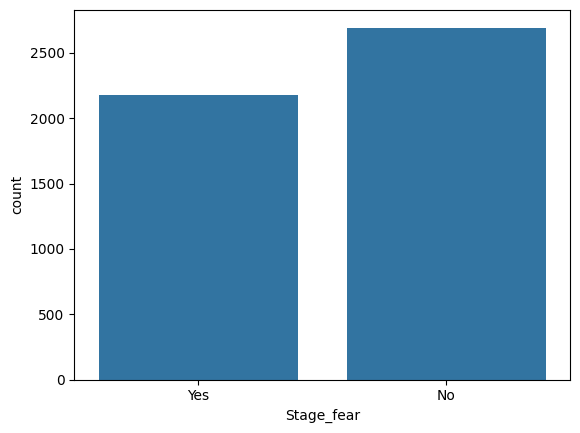

In [12]:
# Count plot of categorical columns
sns.countplot(x=df['Stage_fear'])
plt.show()